In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from keras.models import Sequential

In [2]:
root_path="C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_15seeds"
class_names = sorted(os.listdir(root_path))[:-1]
class_names

['IR20',
 'adt37',
 'amman',
 'andhra bpt',
 'eramalli',
 'karuppu kavuni',
 'keerthi',
 'mtu 1010',
 'mtu 1290',
 'narmadha',
 'pacha ponni']

In [3]:
file_path ="C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_15seeds"

In [4]:
filepaths= list(glob.glob(file_path+'/**/*.*'))

In [5]:
print(filepaths[0:2])

['C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_15seeds\\adt37\\adt37 (1).jpg', 'C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_15seeds\\adt37\\adt37 (10).jpg']


In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [7]:
labels

['adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',


In [8]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data= data.sample(frac=1).reset_index(drop=True)
data.head(12)

,Filepath,Label
0,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,narmadha
1,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,sonna masur
2,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,adt37
3,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,amman
4,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,eramalli
5,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,mtu 1010
6,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,keerthi
7,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,IR20
8,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,eramalli
9,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,andhra bpt


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'narmadha'),
  Text(1, 0, 'sonna masur'),
  Text(2, 0, 'adt37'),
  Text(3, 0, 'amman'),
  Text(4, 0, 'eramalli'),
  Text(5, 0, 'mtu 1010'),
  Text(6, 0, 'keerthi'),
  Text(7, 0, 'IR20'),
  Text(8, 0, 'andhra bpt'),
  Text(9, 0, 'mtu 1290'),
  Text(10, 0, 'pacha ponni'),
  Text(11, 0, 'karuppu kavuni')])

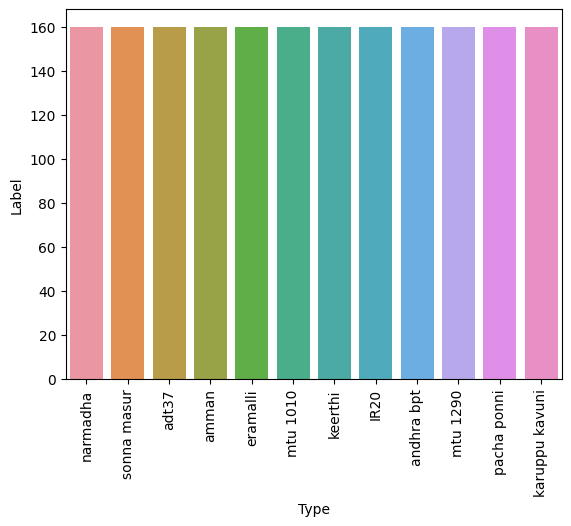

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [10]:
train, test= train_test_split(data, test_size=0.30, random_state=42)

In [11]:
test, valid = train_test_split(test, test_size=0.5, random_state=42)

In [12]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=180,
    width_shift_range=1.0,
    height_shift_range=1.0,
    shear_range=0.7,
    zoom_range=0.7,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=180,
    width_shift_range=1.0,
    height_shift_range=1.0,
    shear_range=0.7,
    zoom_range=0.7,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=40
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=40
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
)

Found 1344 validated image filenames belonging to 12 classes.
Found 288 validated image filenames belonging to 12 classes.
Found 288 validated image filenames belonging to 12 classes.


In [14]:
model = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', input_shape=(512, 512, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(12, activation='softmax')
])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



In [15]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [16]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100
21/21 [==============================] - 512s 22s/step - loss: 2.4324 - accuracy: 0.1481 - val_loss: 2.4895 - val_accuracy: 0.1354
Epoch 2/100
21/21 [==============================] - 367s 18s/step - loss: 2.2351 - accuracy: 0.2307 - val_loss: 2.4477 - val_accuracy: 0.1389
Epoch 3/100
21/21 [==============================] - 345s 17s/step - loss: 2.1274 - accuracy: 0.2522 - val_loss: 2.4173 - val_accuracy: 0.1250
Epoch 4/100
21/21 [==============================] - 332s 16s/step - loss: 2.0537 - accuracy: 0.2656 - val_loss: 2.3601 - val_accuracy: 0.1181
Epoch 5/100
21/21 [==============================] - 339s 16s/step - loss: 2.0036 - accuracy: 0.3080 - val_loss: 2.3437 - val_accuracy: 0.1215
Epoch 6/100
21/21 [==============================] - 328s 16s/step - loss: 1.9476 - accuracy: 0.3214 - val_loss: 2.2790 - val_accuracy: 0.1701
Epoch 7/100
21/21 [==============================] - 323s 15s/step - loss: 1.9072 - accuracy: 0.3348 - val_loss: 2.2415 - val_accuracy: 0.1806

Epoch 58/100
21/21 [==============================] - 345s 16s/step - loss: 0.8796 - accuracy: 0.6979 - val_loss: 1.0287 - val_accuracy: 0.6285
Epoch 59/100
21/21 [==============================] - 332s 16s/step - loss: 0.8803 - accuracy: 0.7091 - val_loss: 1.1324 - val_accuracy: 0.5833
Epoch 60/100
21/21 [==============================] - 333s 16s/step - loss: 0.8656 - accuracy: 0.7076 - val_loss: 0.9833 - val_accuracy: 0.6389
Epoch 61/100
21/21 [==============================] - 325s 16s/step - loss: 0.8680 - accuracy: 0.6964 - val_loss: 0.8791 - val_accuracy: 0.7188
Epoch 62/100
21/21 [==============================] - 330s 16s/step - loss: 0.8298 - accuracy: 0.7314 - val_loss: 0.9665 - val_accuracy: 0.6424
Epoch 63/100
21/21 [==============================] - 342s 16s/step - loss: 0.8387 - accuracy: 0.7277 - val_loss: 0.9804 - val_accuracy: 0.6701
Epoch 64/100
21/21 [==============================] - 329s 16s/step - loss: 0.8512 - accuracy: 0.7098 - val_loss: 0.8735 - val_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


5/5 [==============================] - 51s 10s/step - loss: 0.6705 - accuracy: 0.7743
Test Loss: 0.6705132722854614, Test Accuracy: 0.7743055820465088


In [18]:
model.save("model_best.h5")

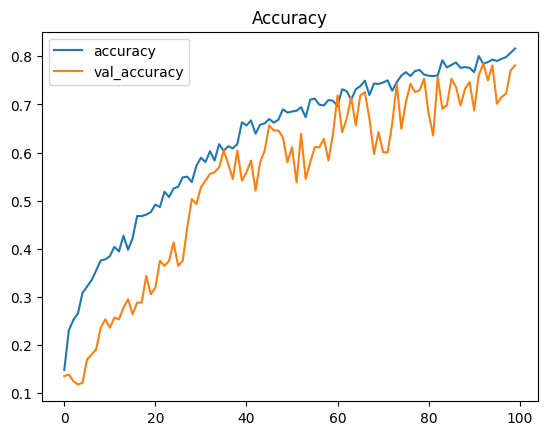

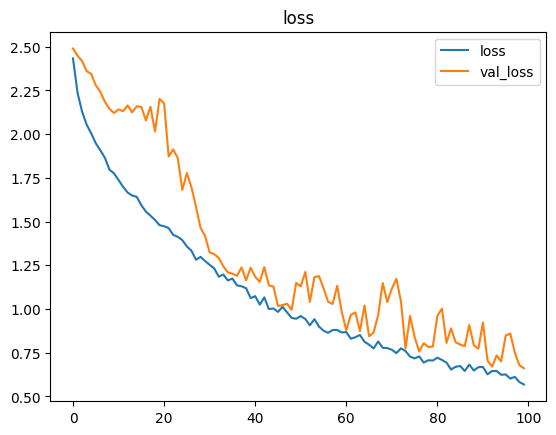

In [19]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("loss")
plt.show()

In [20]:
results = model.evaluate(test_gen, verbose=0)
print("   Test loss:  {:.5f}".format(results[0]))
print("Test Accuracy:  {:.2f}%".format(results[1] * 100))

   Test loss:  0.70549
Test Accuracy:  77.43%


In [21]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

5/5 [==============================] - 59s 10s/step


In [22]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

          IR20       0.10      0.10      0.10        21
         adt37       0.09      0.08      0.08        25
         amman       0.05      0.05      0.05        20
    andhra bpt       0.11      0.07      0.09        27
      eramalli       0.09      0.07      0.08        29
karuppu kavuni       0.08      0.08      0.08        25
       keerthi       0.03      0.03      0.03        30
      mtu 1010       0.05      0.04      0.05        23
      mtu 1290       0.06      0.09      0.07        22
      narmadha       0.04      0.04      0.04        25
   pacha ponni       0.10      0.18      0.12        17
   sonna masur       0.11      0.08      0.09        24

      accuracy                           0.07       288
     macro avg       0.07      0.08      0.07       288
  weighted avg       0.07      0.07      0.07       288



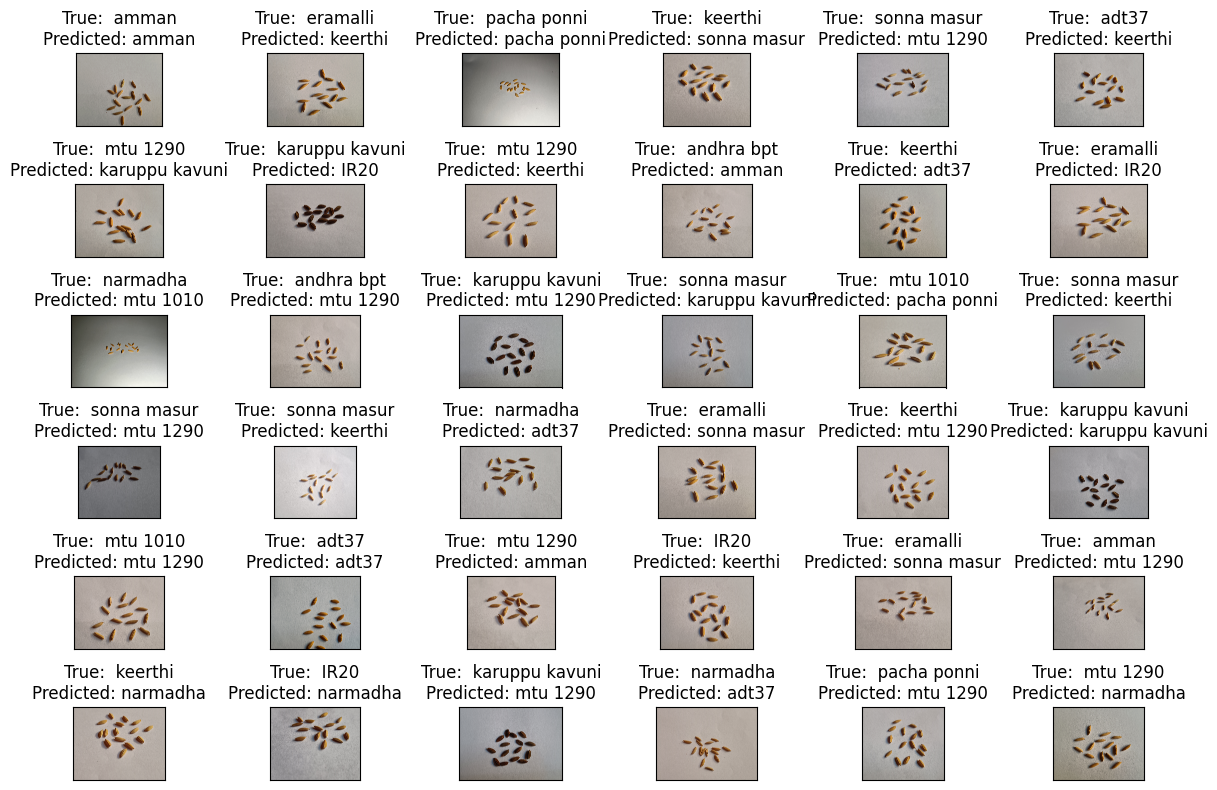

In [23]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(12,8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:  {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()